# **Cotton Yield Prediction in Gujarat**


## Group Members


1.   Babariya Jasmin
2.   Gajera Darshan
3.   Chothani Harsh
4.   Pethani Deep
5.   Velani Harsh

In [86]:
# importing Libraries

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [87]:
df = pd.read_excel('/content/drive/MyDrive/IIRS/Module_2/Data Collection/Main Data set/MAIN_Mod_2_Project.xlsx')        #HERE PASTE THE FILE PATH
df

,District,Year,Area (ha),Prod(kg),Yield(kg/ha),Annual Rainfall (mm),Temperature at 2 m (oC),Relative Humidity at 2 Meters (%),Wind Direction at 2 Meters (Degrees),Wind Speed at 2 Meters (m/s),Mean Evapotranspiration (mm),Mean Soil Moisture,Mean Soil Surface Temperature (oC),Mean NDVI
0,Ahmedabad,2014-15,1590.44,452738.9,284.66,698.1,26.508333,63.018333,155.665000,3.120000,35.254302,0.547102,26.906064,0.366013
1,Ahmedabad,2015-16,1318.81,513427.2,389.31,415.7,27.435000,53.290000,142.478333,3.393333,26.910012,0.487046,28.136036,0.349868
2,Ahmedabad,2016-17,1069.97,410055.3,383.24,436.1,26.535000,59.408333,189.833333,3.130000,35.381869,0.455876,26.630639,0.352656
3,Ahmedabad,2017-18,1054.22,470704.5,446.50,734.5,25.780000,64.726667,203.145000,3.198333,35.420747,0.592435,26.282841,0.371646
4,Ahmedabad,2018-19,1032.00,305940.5,296.45,285.9,26.783333,53.031667,153.551667,3.281667,26.042040,0.451577,28.115811,0.327324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Vadodara,2017-18,840.76,791276.9,941.15,577.1,25.936667,67.801667,143.415000,3.406667,54.413384,0.612803,26.177694,0.529730
236,Vadodara,2018-19,810.44,685759.6,846.16,538.6,26.381667,59.375000,147.436667,3.671667,49.489679,0.601757,26.249325,0.472932
237,Vadodara,2019-20,797.35,622784.8,781.07,1137.0,25.536667,83.281667,152.668333,3.640000,67.038959,0.698654,25.971730,0.515651
238,Vadodara,2020-21,792.77,664293.7,837.94,805.4,25.811667,76.250000,139.795000,3.278333,61.560364,0.643968,26.103380,0.543009


In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
df.shape                 # check shape of dataset

(240, 14)

In [90]:
df.isnull().sum()         #Check any null value or not

District                                 0
Year                                     0
Area (ha)                                0
Prod(kg)                                 0
Yield(kg/ha)                             0
Annual Rainfall (mm)                     0
Temperature at 2 m (oC)                  0
Relative Humidity at 2 Meters (%)        0
Wind Direction at 2 Meters (Degrees)     0
Wind Speed at 2 Meters (m/s)             0
Mean Evapotranspiration (mm)             0
Mean Soil Moisture                       0
Mean Soil Surface Temperature (oC)       0
Mean NDVI                                0
dtype: int64

In [85]:
df.nunique   #check for the unieuqe values for each columns

<bound method DataFrame.nunique of       District     Year  Area (ha)  Prod(kg)  Yield(kg/ha)  \
0    Ahmedabad  2014-15    1590.44  452738.9        284.66   
1    Ahmedabad  2015-16    1318.81  513427.2        389.31   
2    Ahmedabad  2016-17    1069.97  410055.3        383.24   
3    Ahmedabad  2017-18    1054.22  470704.5        446.50   
4    Ahmedabad  2018-19    1032.00  305940.5        296.45   
..         ...      ...        ...       ...           ...   
235   Vadodara  2017-18     840.76  791276.9        941.15   
236   Vadodara  2018-19     810.44  685759.6        846.16   
237   Vadodara  2019-20     797.35  622784.8        781.07   
238   Vadodara  2020-21     792.77  664293.7        837.94   
239   Vadodara  2021-22     749.44  624940.4        833.88   

     Annual Rainfall (mm)  Temperature at 2 m (oC)  \
0                   698.1                26.508333   
1                   415.7                27.435000   
2                   436.1                26.535000   
3   

In [49]:
df.describe()        #Find the Stastics of all Columns

,Area (ha),Prod(kg),Yield(kg/ha),Annual Rainfall (mm),Temperature at 2 m (oC),Relative Humidity at 2 Meters (%),Wind Direction at 2 Meters (Degrees),Wind Speed at 2 Meters (m/s),Mean Evapotranspiration (mm),Mean Soil Moisture,Mean Soil Surface Temperature (oC),Mean NDVI
count,240.000000,2.400000e+02,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,852.244125,4.361680e+05,555.927792,792.476250,26.030771,66.685049,166.051361,3.660701,48.776408,0.583366,26.157682,0.458181
std,988.085375,5.070187e+05,179.901045,335.352648,0.746362,8.484268,22.839342,0.482116,12.525257,0.087299,0.939785,0.082598
min,1.700000,6.171000e+02,66.050000,131.200000,23.861667,45.073333,126.750000,2.453333,12.974712,0.367825,24.074177,0.133949
25%,137.565000,8.762650e+04,434.750000,557.775000,25.565000,60.915000,147.593333,3.352500,41.180025,0.517233,25.552890,0.416194
50%,464.960000,2.428118e+05,557.860000,755.850000,25.970833,66.302500,157.410833,3.576667,49.149851,0.579625,26.062420,0.476208
75%,1074.110000,6.233237e+05,665.407500,962.225000,26.536250,74.149167,188.379167,3.897500,56.699957,0.639232,26.631564,0.515208
max,4129.520000,2.493881e+06,1238.150000,2166.400000,27.510000,83.521667,247.635000,4.975000,79.109116,0.821945,30.494112,0.593131


In [50]:
df.info()           #Find the Datatype of all Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   District                               240 non-null    object 
 1   Year                                   240 non-null    object 
 2   Area (ha)                              240 non-null    float64
 3   Prod(kg)                               240 non-null    float64
 4   Yield(kg/ha)                           240 non-null    float64
 5   Annual Rainfall (mm)                   240 non-null    float64
 6   Temperature at 2 m (oC)                240 non-null    float64
 7   Relative Humidity at 2 Meters (%)      240 non-null    float64
 8   Wind Direction at 2 Meters (Degrees)   240 non-null    float64
 9   Wind Speed at 2 Meters (m/s)           240 non-null    float64
 10  Mean Evapotranspiration (mm)           240 non-null    float64
 11  Mean S

In [51]:
dff=df.iloc[:,2:]
dff                     #Remove District and Year Columns

,Area (ha),Prod(kg),Yield(kg/ha),Annual Rainfall (mm),Temperature at 2 m (oC),Relative Humidity at 2 Meters (%),Wind Direction at 2 Meters (Degrees),Wind Speed at 2 Meters (m/s),Mean Evapotranspiration (mm),Mean Soil Moisture,Mean Soil Surface Temperature (oC),Mean NDVI
0,1590.44,452738.9,284.66,698.1,26.508333,63.018333,155.665000,3.120000,35.254302,0.547102,26.906064,0.366013
1,1318.81,513427.2,389.31,415.7,27.435000,53.290000,142.478333,3.393333,26.910012,0.487046,28.136036,0.349868
2,1069.97,410055.3,383.24,436.1,26.535000,59.408333,189.833333,3.130000,35.381869,0.455876,26.630639,0.352656
3,1054.22,470704.5,446.50,734.5,25.780000,64.726667,203.145000,3.198333,35.420747,0.592435,26.282841,0.371646
4,1032.00,305940.5,296.45,285.9,26.783333,53.031667,153.551667,3.281667,26.042040,0.451577,28.115811,0.327324
...,...,...,...,...,...,...,...,...,...,...,...,...
235,840.76,791276.9,941.15,577.1,25.936667,67.801667,143.415000,3.406667,54.413384,0.612803,26.177694,0.529730
236,810.44,685759.6,846.16,538.6,26.381667,59.375000,147.436667,3.671667,49.489679,0.601757,26.249325,0.472932
237,797.35,622784.8,781.07,1137.0,25.536667,83.281667,152.668333,3.640000,67.038959,0.698654,25.971730,0.515651
238,792.77,664293.7,837.94,805.4,25.811667,76.250000,139.795000,3.278333,61.560364,0.643968,26.103380,0.543009


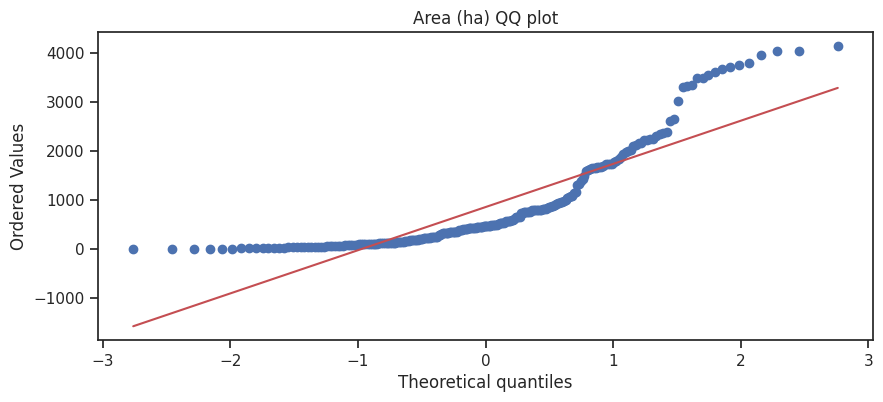

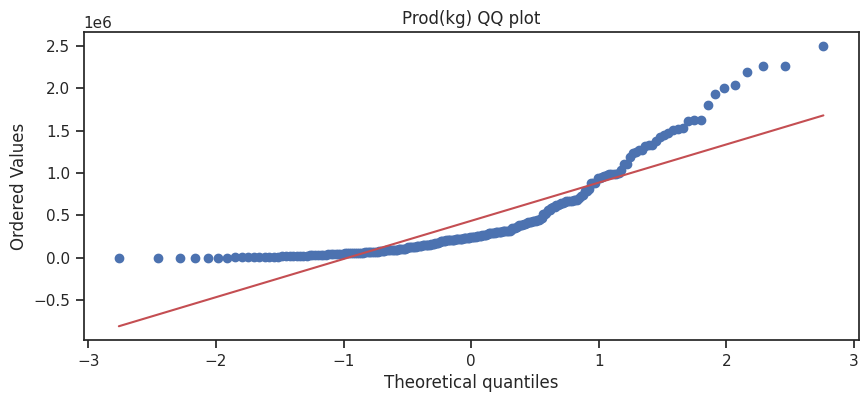

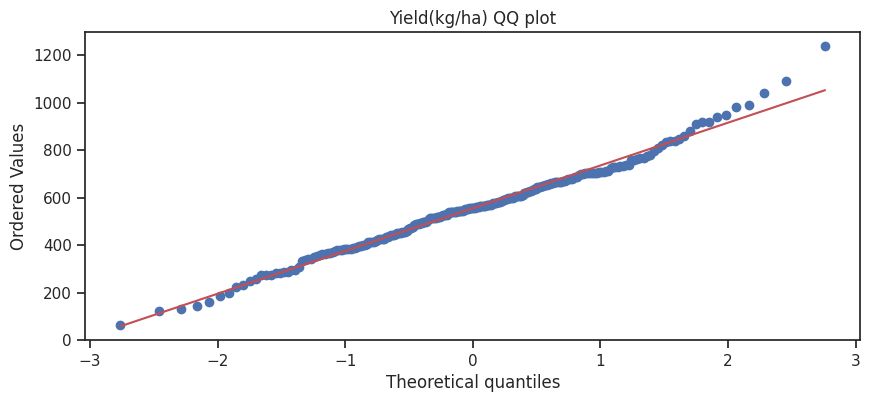

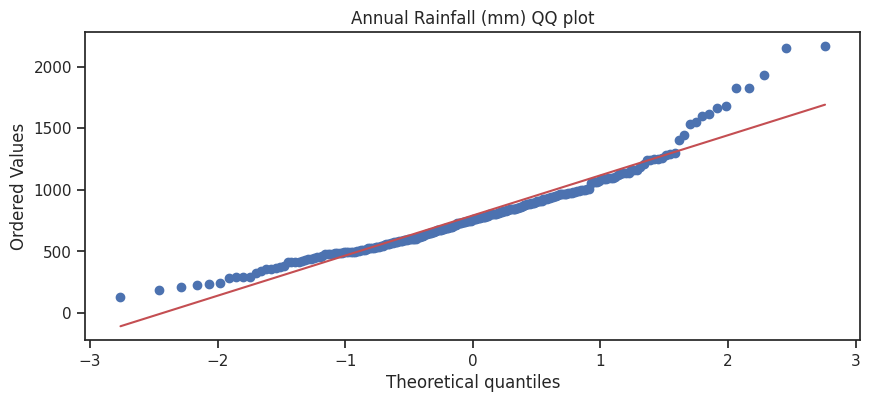

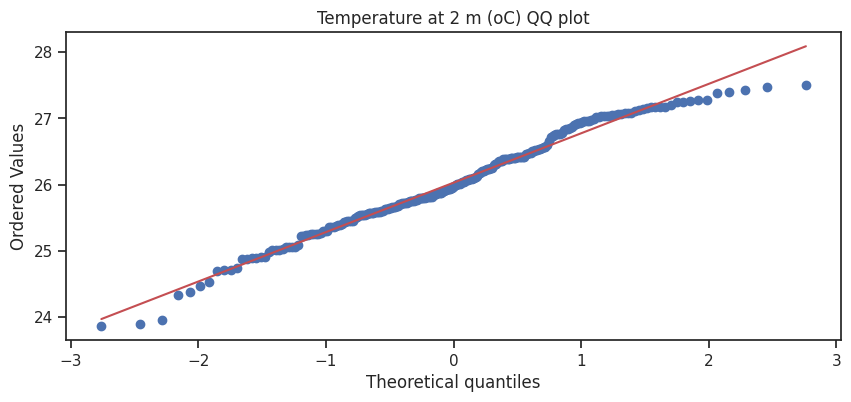

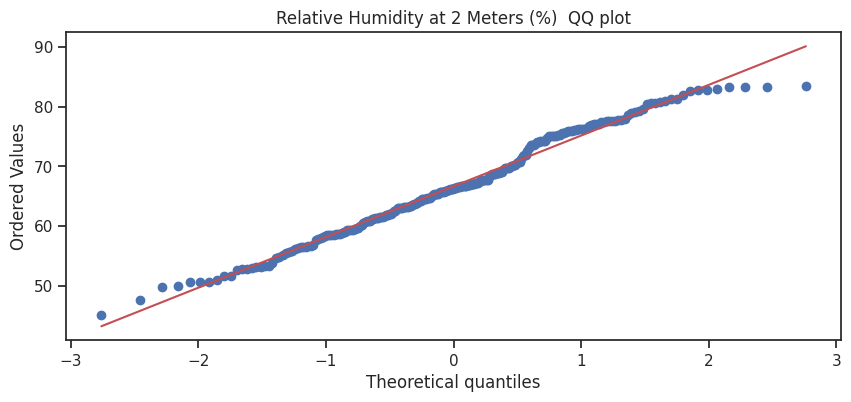

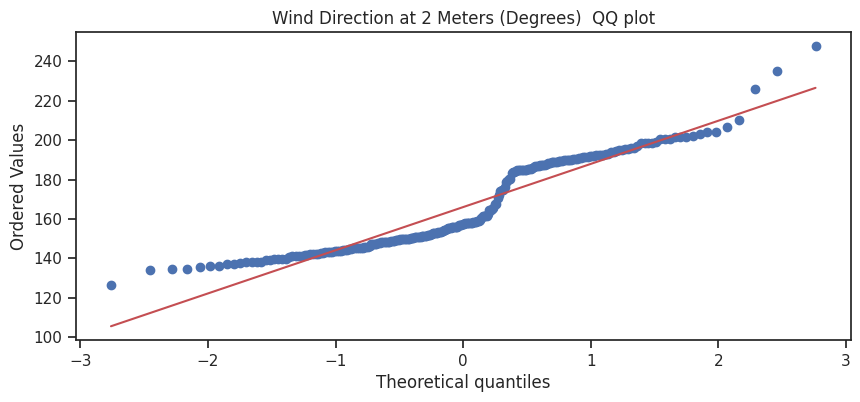

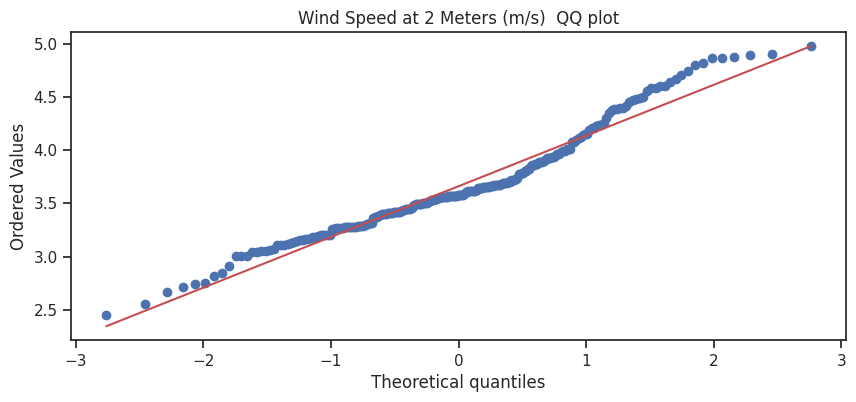

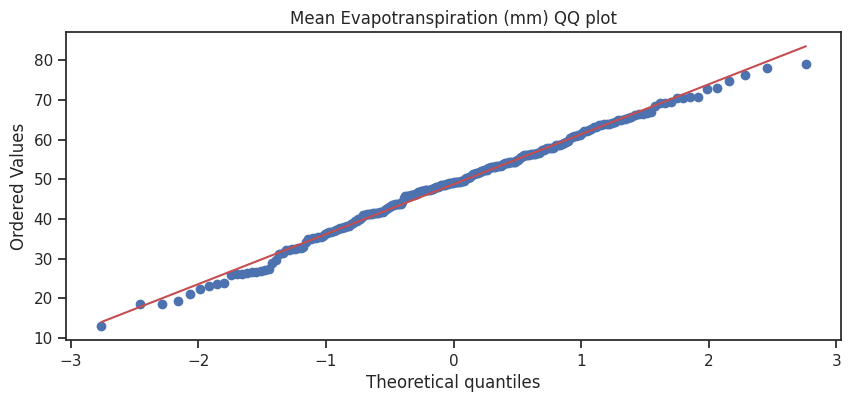

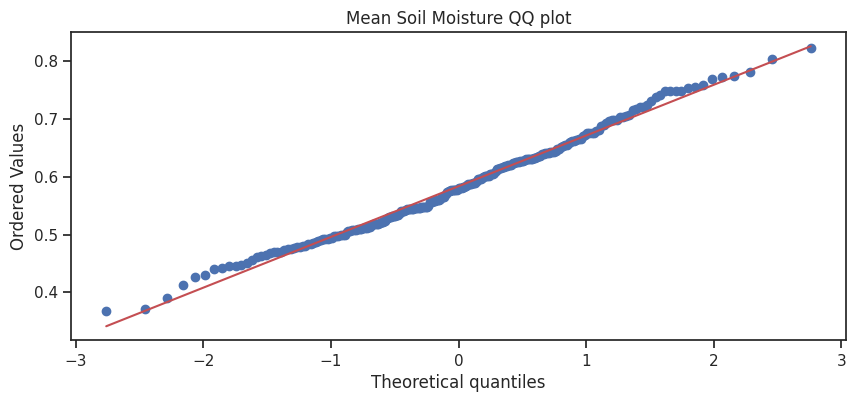

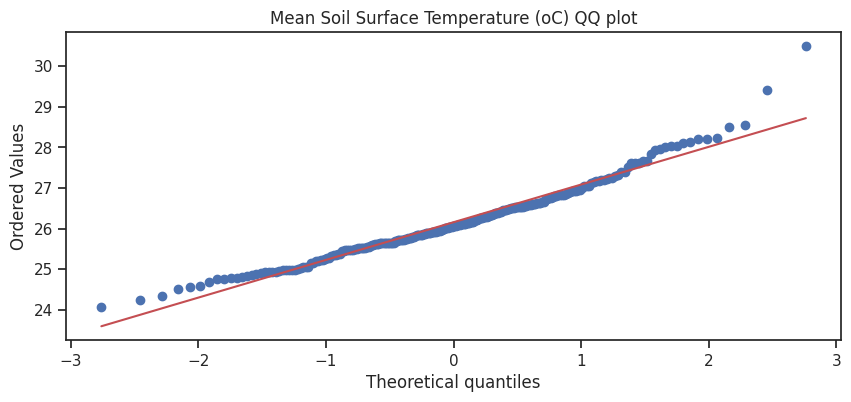

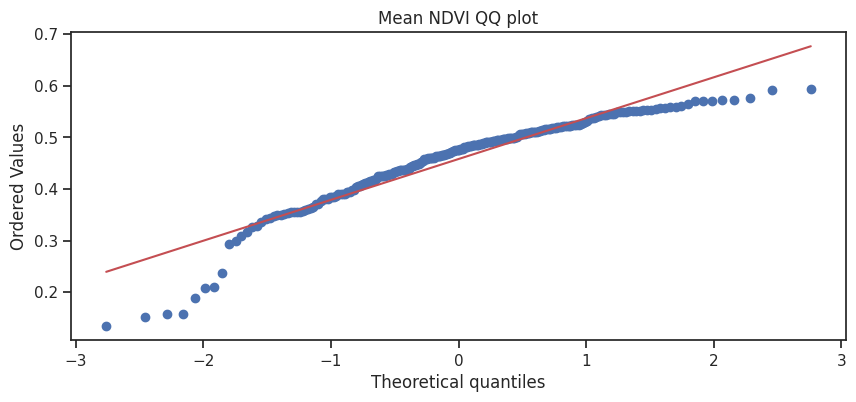

In [52]:
#Check column wise Distribution of Data by the use of QQ plot
for col in dff.columns:
    plt.figure(figsize=(10, 4))
    stats.probplot(dff[col], dist="norm", plot=plt)
    plt.title(f"{col} QQ plot")
    plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill

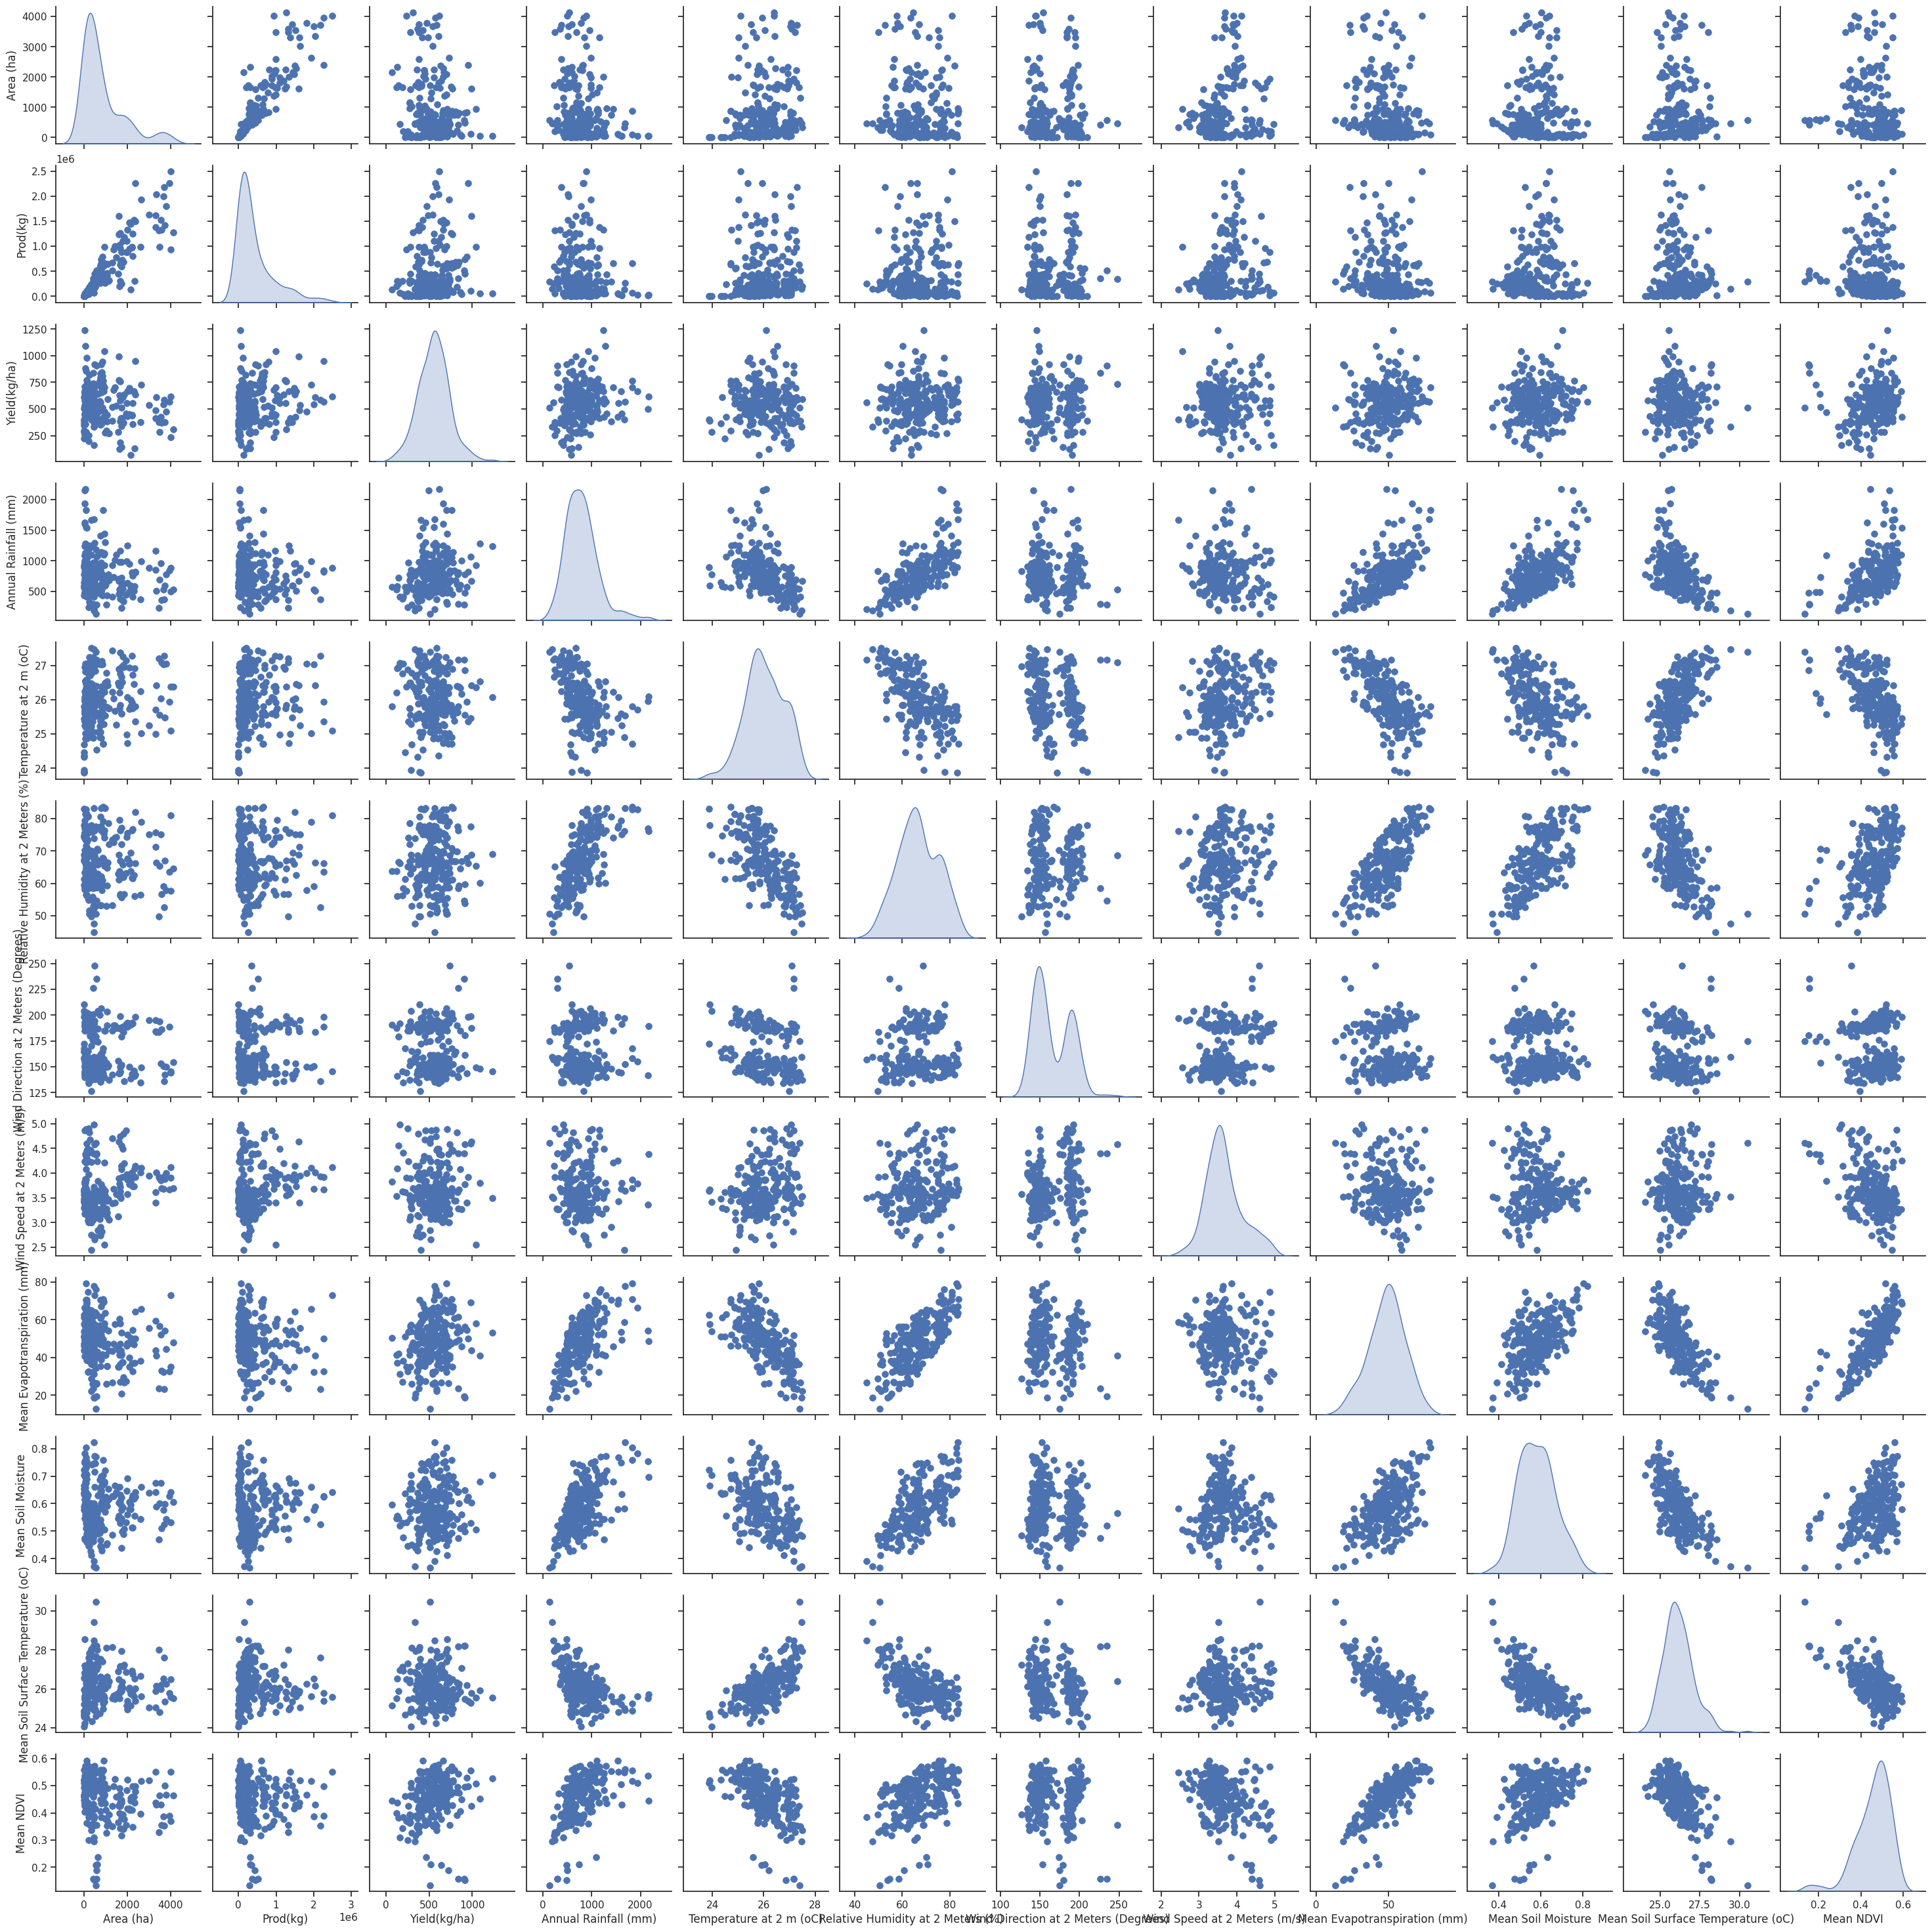

In [53]:
# Pairplot for visualizing relationships between variables
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, kind="scatter", diag_kind="kde", palette="husl", markers="o",
             plot_kws=dict(s=50, edgecolor="b", linewidth=0.5), diag_kws=dict(shade=True))
plt.show()

<ipython-input-54-dec9b6ae03ee>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


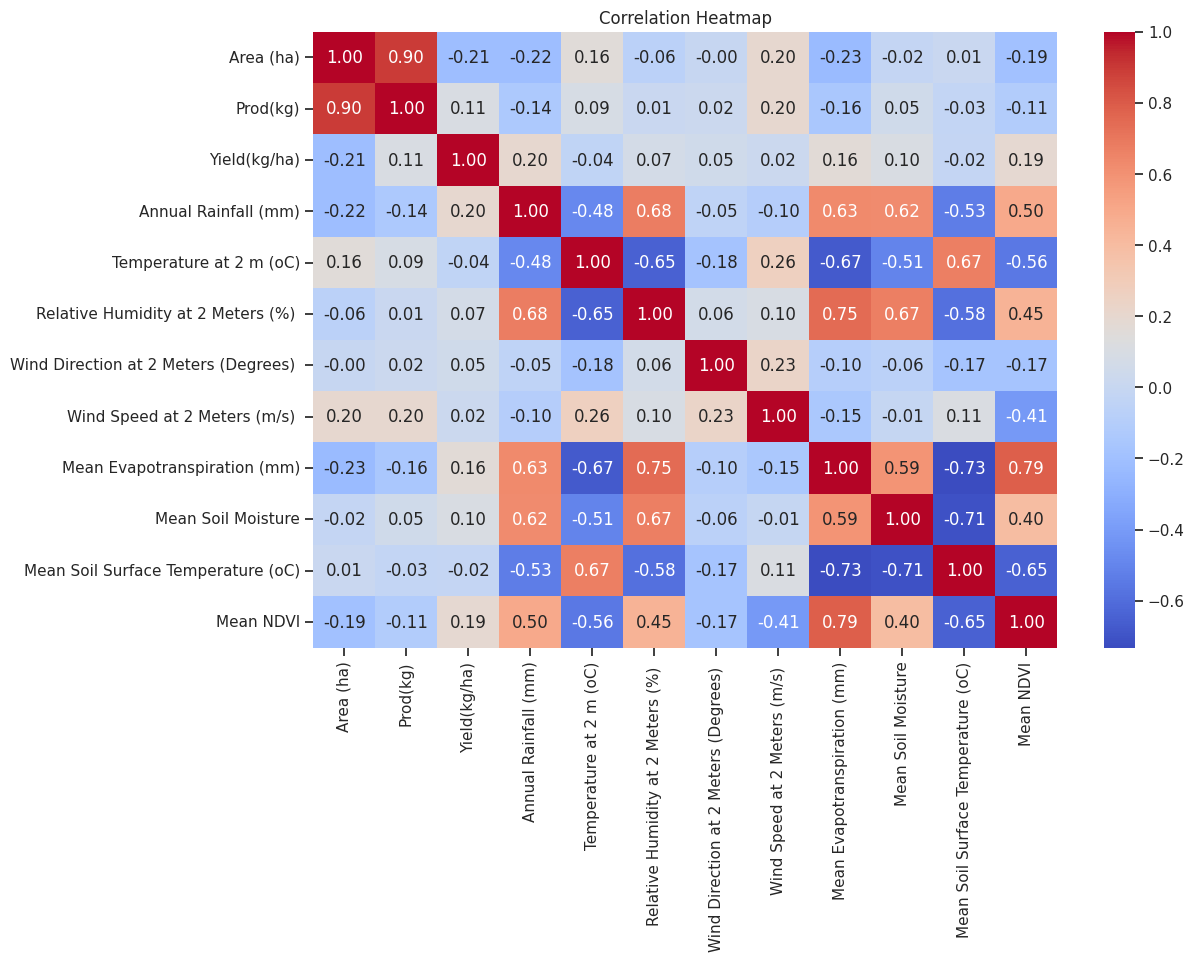

In [54]:
# Correlation heatmap of all Column
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

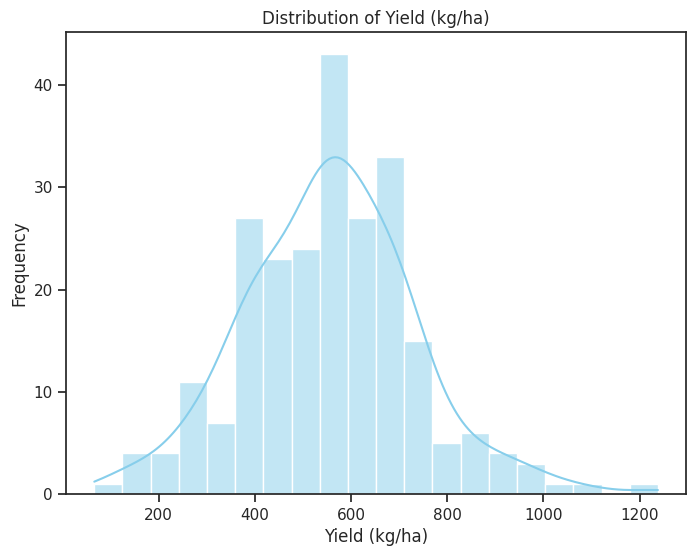

In [55]:
# Distribution of Yield (kg/ha)
plt.figure(figsize=(8, 6))
sns.histplot(df['Yield(kg/ha)'], bins=20, kde=True, color='skyblue')
plt.xlabel('Yield (kg/ha)')
plt.ylabel('Frequency')
plt.title('Distribution of Yield (kg/ha)')
plt.show()

In [56]:
features = df.drop(columns=['Yield(kg/ha)', 'District', 'Year'])
Y_PRE = df[['Yield(kg/ha)']]      #Split Independent and Dependent Column into Feature and Target
target = Y_PRE

In [57]:
x = features
y = target

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20, random_state = 42)     #Split train and test data

In [59]:
x_train

,Area (ha),Prod(kg),Annual Rainfall (mm),Temperature at 2 m (oC),Relative Humidity at 2 Meters (%),Wind Direction at 2 Meters (Degrees),Wind Speed at 2 Meters (m/s),Mean Evapotranspiration (mm),Mean Soil Moisture,Mean Soil Surface Temperature (oC),Mean NDVI
139,79.80,54258.9,749.5,25.253333,65.313333,155.980000,3.368333,54.312067,0.641340,25.474305,0.522899
60,1661.41,310919.8,379.0,26.770000,56.311667,145.501667,3.628333,27.057391,0.529831,27.141931,0.343823
204,786.62,403491.6,508.8,25.438333,53.170000,161.386667,3.168333,50.389205,0.441914,26.274780,0.477648
186,105.10,90191.8,602.1,26.338333,64.508333,185.250000,4.080000,54.170785,0.511286,25.843706,0.405063
207,423.29,233738.1,729.5,25.051667,67.813333,192.230000,3.428333,54.955550,0.463100,26.116104,0.569747
...,...,...,...,...,...,...,...,...,...,...,...
106,1729.12,251103.6,729.3,26.961667,66.676667,179.448333,4.551667,42.167137,0.547003,25.882694,0.381322
14,3313.35,1379478.6,1161.8,25.006667,75.696667,195.001667,3.608333,59.398487,0.676055,25.059687,0.550311
92,239.84,168512.5,326.5,26.771667,50.665000,158.210000,3.271667,41.414656,0.448180,27.393223,0.471212
179,397.95,227097.9,932.0,26.011667,63.105000,191.188333,3.260000,25.909851,0.582133,26.444451,0.359308


In [60]:
x_train.shape

(192, 11)

In [61]:
y_train

,Yield(kg/ha)
139,679.95
60,187.14
204,512.94
186,858.16
207,552.19
...,...
106,145.22
14,416.34
92,702.60
179,570.67


In [62]:
y_train.shape

(192, 1)

In [63]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [64]:
trf=FunctionTransformer(func=np.log1p)       #Used LOG transformer in Mathematical transformaion for all Coloumn

In [65]:
x_train_transformed = trf.fit_transform(x_train)             #Mathematical transformaion fit on Train Data
x_test_transformed = trf.transform(x_test)                   #Mathematical transformaion fit on Test Data

In [66]:
x_train_transformed

,Area (ha),Prod(kg),Annual Rainfall (mm),Temperature at 2 m (oC),Relative Humidity at 2 Meters (%),Wind Direction at 2 Meters (Degrees),Wind Speed at 2 Meters (m/s),Mean Evapotranspiration (mm),Mean Soil Moisture,Mean Soil Surface Temperature (oC),Mean NDVI
139,4.391977,10.901541,6.620740,3.267793,4.194391,5.056118,1.474382,4.012991,0.495513,3.276175,0.420616
60,7.416024,12.647293,5.940171,3.323956,4.048504,4.987037,1.532197,3.334252,0.425157,3.337261,0.295518
204,6.669016,12.907913,6.234018,3.274815,3.992127,5.089980,1.427516,3.939428,0.365972,3.305962,0.390451
186,4.664382,11.409705,6.402083,3.308290,4.182177,5.227090,1.625311,4.010434,0.412961,3.290031,0.340082
207,6.050417,12.361961,6.593729,3.260082,4.231398,5.263881,1.488023,4.024558,0.380557,3.300128,0.450914
...,...,...,...,...,...,...,...,...,...,...,...
106,7.455946,12.433625,6.593455,3.330835,4.214741,5.195444,1.714098,3.765079,0.436319,3.291483,0.323041
14,8.106017,14.137217,7.058586,3.258353,4.339858,5.278123,1.527866,4.100964,0.516443,3.260390,0.438455
92,5.484133,12.034771,5.791488,3.324016,3.944781,5.070224,1.452004,3.747494,0.370308,3.346150,0.386087
179,5.988836,12.333141,6.838405,3.296269,4.160522,5.258476,1.449269,3.292492,0.458774,3.312164,0.306975


In [67]:
x_train_transformed.isnull().sum()                  #Check any null value or not

Area (ha)                                0
Prod(kg)                                 0
Annual Rainfall (mm)                     0
Temperature at 2 m (oC)                  0
Relative Humidity at 2 Meters (%)        0
Wind Direction at 2 Meters (Degrees)     0
Wind Speed at 2 Meters (m/s)             0
Mean Evapotranspiration (mm)             0
Mean Soil Moisture                       0
Mean Soil Surface Temperature (oC)       0
Mean NDVI                                0
dtype: int64

# **Linear Regresion**

In [68]:
from sklearn.linear_model import LinearRegression               #apply Linear Regression on Data set
rg_lin=LinearRegression()

rg_lin.fit(x_train_transformed,y_train)
y_pred1 = rg_lin.predict(x_test_transformed)


mae = mean_absolute_error(y_test, y_pred1)
rmse = mean_squared_error(y_test, y_pred1, squared=False)
r_squared = r2_score(y_test, y_pred1)

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

Mean Absolute Error: 34.20379821623098
Root Mean Squared Error: 55.28027674044092
R-squared: 0.8857380994308578


In [69]:
#Checking Accuracy using test data (Cross Validation)
mse=cross_val_score(rg_lin,x_train_transformed,y_train,scoring="r2",cv=10)
np.mean(mse)

0.8753689404180853

In [70]:
# Finding Mean Absolute Error, Mean Squared Error and R-squared Score separately for Train and Test data

rg_linear = LinearRegression()
rg_linear.fit(x_train_transformed, y_train)
y_pred_train = rg_linear.predict(x_train_transformed)
y_pred_test = rg_linear.predict(x_test_transformed)

mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
r_squared_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r_squared_test = r2_score(y_test, y_pred_test)

print("Linear Regression Metrics:")
print("Training Set - Mean Absolute Error:", mae_train)
print("Training Set - Root Mean Squared Error:", rmse_train)
print("Training Set - R-squared:", r_squared_train)

print("\nTesting Set - Mean Absolute Error:", mae_test)
print("Testing Set - Root Mean Squared Error:", rmse_test)
print("Testing Set - R-squared:", r_squared_test)


Linear Regression Metrics:
Training Set - Mean Absolute Error: 38.947877940336596
Training Set - Root Mean Squared Error: 58.69515147788012
Training Set - R-squared: 0.8966239070889375

Testing Set - Mean Absolute Error: 34.20379821623098
Testing Set - Root Mean Squared Error: 55.28027674044092
Testing Set - R-squared: 0.8857380994308578


# **Ridge Regression**

In [71]:
from sklearn.linear_model import Ridge            #apply Ridge Regression on Data set

rg_ridge = Ridge(alpha=0.1)
rg_ridge.fit(x_train_transformed, y_train)
y_pred_ridge = rg_ridge.predict(x_test_transformed)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r_squared_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Metrics:")
print("Mean Absolute Error:", mae_ridge)
print("Root Mean Squared Error:", rmse_ridge)
print("R-squared:", r_squared_ridge)


Ridge Regression Metrics:
Mean Absolute Error: 34.45637327270763
Root Mean Squared Error: 54.16467033241659
R-squared: 0.8903033828292067


In [72]:
#Checking Accuracy using test data (Cross Validation)
mse=cross_val_score(rg_ridge,x_train_transformed,y_train,scoring="r2",cv=10)
np.mean(mse)

0.8791045629416061

In [73]:
# Finding Mean Absolute Error, Mean Squared Error and R-squared Score separately for Train and Test data

reg_ridge = Ridge(alpha=1.0)
reg_ridge.fit(x_train_transformed, y_train)

y_pred_train = reg_ridge.predict(x_train_transformed)
y_pred_test = reg_ridge.predict(x_test_transformed)

mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
r_squared_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r_squared_test = r2_score(y_test, y_pred_test)

print("Ridge Regression Metrics:")
print("Training Set - Mean Absolute Error:", mae_train)
print("Training Set - Root Mean Squared Error:", rmse_train)
print("Training Set - R-squared:", r_squared_train)

print("\nTesting Set - Mean Absolute Error:", mae_test)
print("Testing Set - Root Mean Squared Error:", rmse_test)
print("Testing Set - R-squared:", r_squared_test)


Ridge Regression Metrics:
Training Set - Mean Absolute Error: 42.88408096317789
Training Set - Root Mean Squared Error: 61.088757069636515
Training Set - R-squared: 0.8880205741632186

Testing Set - Mean Absolute Error: 36.154008846550695
Testing Set - Root Mean Squared Error: 55.48146141495897
Testing Set - R-squared: 0.8849049062944077


# **Lasso Regression**

In [74]:
from sklearn.linear_model import Lasso                 #apply Lasso Regression on Data set

rg_lasso = Lasso(alpha=0.1)
rg_lasso.fit(x_train_transformed, y_train)
y_pred_lasso = rg_lasso.predict(x_test_transformed)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r_squared_lasso = r2_score(y_test, y_pred_lasso)

print("Mean Absolute Error:", mae_lasso)
print("Root Mean Squared Error:", rmse_lasso)
print("R-squared:", r_squared_lasso)


Mean Absolute Error: 34.14543437724187
Root Mean Squared Error: 53.30695228662236
R-squared: 0.8937500502571887


In [75]:
#Checking Accuracy using test data (Cross Validation)
mse=cross_val_score(rg_lasso,x_train_transformed,y_train,scoring="r2",cv=10)
np.mean(mse)

0.8761362358758717

In [76]:
# Finding Mean Absolute Error, Mean Squared Error and R-squared Score separately for Train and Test data

reg_lasso = Lasso(alpha=1.0)
reg_lasso.fit(x_train_transformed, y_train)
y_pred_train = reg_lasso.predict(x_train_transformed)
y_pred_test = reg_lasso.predict(x_test_transformed)

mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
r_squared_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r_squared_test = r2_score(y_test, y_pred_test)

print("Lasso Regression Metrics:")
print("Training Set - Mean Absolute Error:", mae_train)
print("Training Set - Root Mean Squared Error:", rmse_train)
print("Training Set - R-squared:", r_squared_train)

print("\nTesting Set - Mean Absolute Error:", mae_test)
print("Testing Set - Root Mean Squared Error:", rmse_test)
print("Testing Set - R-squared:", r_squared_test)


Lasso Regression Metrics:
Training Set - Mean Absolute Error: 43.05577156282001
Training Set - Root Mean Squared Error: 62.0271396526504
Training Set - R-squared: 0.8845539262951355

Testing Set - Mean Absolute Error: 33.19156205543737
Testing Set - Root Mean Squared Error: 49.758312624371904
Testing Set - R-squared: 0.9074252995705272


# **Principal Component Analysis (PCA)**

In [77]:
from sklearn.decomposition import PCA            #apply PCA on Data set

In [78]:
pca = PCA(n_components=None)            #Checking number of Dimension in data which best fits in Linear Rigresion Algoritum
x_train_trf=pca.fit_transform(x_train_transformed)
x_test_trf=pca.fit_transform(x_test_transformed)

In [79]:
x_train_trf.shape

(192, 11)

In [80]:
pca.explained_variance_   #variance after performing PCA

array([4.40903372e+00, 2.13401793e-01, 4.67959944e-02, 2.81623818e-02,
       1.93408204e-02, 9.16371239e-03, 5.41503274e-03, 1.34218777e-03,
       9.53436687e-04, 2.52786341e-04, 1.31929278e-04])

In [81]:
#CUMILATIVE SUM
np.cumsum(pca.explained_variance_ratio_)

array([0.93135604, 0.97643464, 0.98631974, 0.9922687 , 0.99635422,
       0.99828995, 0.99943381, 0.99971733, 0.99991873, 0.99997213,
       1.        ])

In [82]:
pca = PCA(n_components=4)                            # performed PCA by setting no. of components as 4
x_train_pca = pca.fit_transform(x_train_transformed)
x_test_pca = pca.transform(x_test_transformed)

clf_lr_pca = LinearRegression()
clf_lr_pca.fit(x_train_pca, y_train)
y_pred_lr_pca = clf_lr_pca.predict(x_test_pca)

y_pred_lr_pca

mae_lr_pca = mean_absolute_error(y_test, y_pred_lr_pca)
rmse_lr_pca = mean_squared_error(y_test, y_pred_lr_pca, squared=False)
r_squared_lr_pca = r2_score(y_test, y_pred_lr_pca)

print("Mean Absolute Error:", mae_lr_pca)
print("Root Mean Squared Error:", rmse_lr_pca)
print("R-squared:", r_squared_lr_pca)


Mean Absolute Error: 32.115719219093904
Root Mean Squared Error: 47.534831870644545
R-squared: 0.9155139606972997


In [83]:
#Checking Accuracy using test data (Cross Validation)
mse=cross_val_score(clf_lr_pca,x_train_transformed,y_train,scoring="r2",cv=10)
np.mean(mse)

0.8753689404180853

In [84]:
from sklearn.preprocessing import StandardScaler
# Finding Mean Absolute Error, Mean Squared Error and R-squared Score separately for Train and Test data

scaler = StandardScaler()
x_scaled = scaler.fit_transform(dff)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
pca = PCA(n_components=4)  # Choose the number of principal components
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

clf_linear = LinearRegression()
clf_linear.fit(x_train_pca, y_train)
y_pred_train = clf_linear.predict(x_train_pca)
y_pred_test = clf_linear.predict(x_test_pca)

mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
r_squared_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r_squared_test = r2_score(y_test, y_pred_test)

print("PCA Regression Metrics:")
print("Training Set - Mean Absolute Error:", mae_train)
print("Training Set - Root Mean Squared Error:", rmse_train)
print("Training Set - R-squared:", r_squared_train)

print("\nTesting Set - Mean Absolute Error:", mae_test)
print("Testing Set - Root Mean Squared Error:", rmse_test)
print("Testing Set - R-squared:", r_squared_test)


PCA Regression Metrics:
Training Set - Mean Absolute Error: 29.836075296582568
Training Set - Root Mean Squared Error: 37.58503968276245
Training Set - R-squared: 0.9576117307091874

Testing Set - Mean Absolute Error: 36.39856431107515
Testing Set - Root Mean Squared Error: 44.49504999836575
Testing Set - R-squared: 0.925973975807544
